# 导入机器学习以及数据处理库


In [3]:
from autogluon.tabular import TabularDataset , TabularPredictor
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from d2l import torch as d2l

```python
d2l.plot([time, time[tau:], time[n_train + tau:]],
         [x.detach().numpy(), onestep_preds.detach().numpy(),
          multistep_preds[n_train + tau:].detach().numpy()], 'time',
         'x', legend=['data', '1-step preds', 'multistep preds'],
         xlim=[1, 1000], figsize=(6, 3))
```

# 导入数据进行机器学习


### 这里是直接拿组分的百分比进行学习

In [4]:
train_data = pd.read_excel(r"C:\Users\23174\Desktop\GitHub项目\毕设\MachineLearningOER\数据\四元数据_修正.xlsx", dtype="float64")
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5330 entries, 0 to 5329
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ni           5330 non-null   float64
 1   Fe           5330 non-null   float64
 2   Co           5330 non-null   float64
 3   Ce           5330 non-null   float64
 4   3mA cm‐2     5330 non-null   float64
 5   10 mA cm‐2   5330 non-null   float64
dtypes: float64(6)
memory usage: 250.0 KB


In [3]:
train_data.describe()

,Ni,Fe,Co,Ce,3mA cm‐2,10 mA cm‐2
count,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000
mean,0.252833,0.251426,0.252274,0.244253,397.499437,420.641463
std,0.205460,0.205573,0.205725,0.197814,18.990227,13.120612
min,0.000000,0.000000,0.000000,0.000000,277.000000,390.000000
25%,0.102000,0.071000,0.102000,0.071000,387.000000,411.000000
50%,0.200000,0.200000,0.200000,0.200000,399.000000,419.000000
75%,0.369000,0.369000,0.369000,0.369000,411.000000,429.000000
max,1.000000,1.000000,1.000000,0.898000,440.000000,470.000000


In [4]:
train_data.columns

Index(['Ni', 'Fe', 'Co', 'Ce', '3mA cm‐2 ', '10 mA cm‐2 '], dtype='object')

## 这里先删除掉3mA的数据，先做10mA的回归

In [5]:
train_data = train_data.drop(['3mA cm‐2 '], axis=1)
train_data.head()

,Ni,Fe,Co,Ce,10 mA cm‐2
0,1.000,0.000,0.000,0.0,441.0
1,0.969,0.031,0.000,0.0,426.0
2,0.969,0.000,0.031,0.0,423.0
3,0.929,0.071,0.000,0.0,420.0
4,0.929,0.031,0.031,0.0,422.0


In [6]:
from autogluon.tabular import TabularDataset, TabularPredictor
import numpy as np
import pandas as pd
from sklearn.utils import shuffle as reset
def train_test_split(data, test_size=0.3, shuffle=True, random_state=None):
    '''Split DataFrame into random train and test subsets
    
    Parameters
    ----------
    data : pandas dataframe, need to split dataset.
    
    test_size : float
        If float, should be between 0.0 and 1.0 and represent the
        proportion of the dataset to include in the train split.
        
    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.
        
    shuffle : boolean, optional (default=None)
        Whether or not to shuffle the data before splitting. If shuffle=False
        then stratify must be None.
    '''

    if shuffle:
        data = reset(data, random_state=random_state)
	
    train = data[int(len(data)*test_size):].reset_index(drop = True)
    test  = data[:int(len(data)*test_size)].reset_index(drop = True)
    
    return train, test

In [7]:
train , test = train_test_split(train_data, test_size=0.3)

In [8]:
label = "10 mA cm‐2 "
save = "四元组分10mAcm-2回归"

In [10]:
predictor = TabularPredictor(label=label, problem_type="regression", path=save).fit(train)

Beginning AutoGluon training ...
AutoGluon will save models to "四元组分10mAcm-2回归\"
AutoGluon Version:  0.5.2
Python Version:     3.9.0
Operating System:   Windows
Train Data Rows:    3731
Train Data Columns: 4
Label Column: 10 mA cm‐2 
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    8763.58 MB
	Train Data (Original)  Memory Usage: 0.12 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('float', []) : 4 | ['Ni', 'Fe', 'Co', 'Ce']
	Types of features in processed data (raw dt

[1000]	valid_set's rmse: 5.00554
[2000]	valid_set's rmse: 4.93904
[3000]	valid_set's rmse: 4.91124
[4000]	valid_set's rmse: 4.90435
[5000]	valid_set's rmse: 4.9056


	-4.9021	 = Validation score   (-root_mean_squared_error)
	5.04s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 4.88685


	-4.8868	 = Validation score   (-root_mean_squared_error)
	1.95s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-5.0814	 = Validation score   (-root_mean_squared_error)
	1.09s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost ...
	-4.7454	 = Validation score   (-root_mean_squared_error)
	3.99s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-4.9227	 = Validation score   (-root_mean_squared_error)
	0.7s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-5.7261	 = Validation score   (-root_mean_squared_error)
	4.87s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: XGBoost ...
	-4.8796	 = Validation score   (-root_mean_squared_error)
	0.9s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-5.3225	 = Validation score   (-root_mean_squared_error)
	42.28s	 = Training   runtime
	0.05s	 = Validation runtim

In [9]:
test_nolabel = test.drop(columns = [label])
test_nolabel.head()


,Ni,Fe,Co,Ce
0,0.431,0.231,0.169,0.169
1,0.129,0.169,0.302,0.400
2,0.369,0.031,0.302,0.302
3,0.169,0.302,0.031,0.498
4,0.000,0.102,0.129,0.769


In [10]:
train_nolabel = train.drop(columns = [label])
train_nolabel.head()

,Ni,Fe,Co,Ce
0,0.031,0.071,0.631,0.271
1,0.200,0.129,0.271,0.400
2,0.529,0.000,0.129,0.329
3,0.702,0.102,0.031,0.169
4,0.400,0.102,0.102,0.400


In [11]:
y_test = test[label]

In [12]:
y_train = train[label]

# 导入模型 

- 各个指标

In [13]:
predictor = TabularPredictor.load(save)
y_pred = predictor.predict(test_nolabel)
y_pred_train = predictor.predict(train_nolabel)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

- 各个模型的表现

In [14]:
predictor_leaderboard = predictor.leaderboard(test,silent=True)
predictor_leaderboard = predictor_leaderboard.set_index(predictor_leaderboard ["model"])

In [15]:
predictor_leaderboard.loc[:,"score_val"] = -predictor_leaderboard.loc[:,"score_val"]
predictor_leaderboard.loc[:,"score_test"] = -predictor_leaderboard.loc[:,"score_test"]
predictor_leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
model,,,,,,,,,,,,
ExtraTreesMSE,ExtraTreesMSE,3.420074,4.922723,0.144785,0.049526,0.700485,0.144785,0.049526,0.700485,1,True,7
RandomForestMSE,RandomForestMSE,3.493610,5.081393,0.137074,0.056318,1.085329,0.137074,0.056318,1.085329,1,True,5
XGBoost,XGBoost,3.627102,4.879600,0.016200,0.010733,0.904919,0.016200,0.010733,0.904919,1,True,9
LightGBMLarge,LightGBMLarge,3.693682,4.889714,0.023232,0.010589,2.921360,0.023232,0.010589,2.921360,1,True,11
KNeighborsDist,KNeighborsDist,3.754339,5.595888,0.031693,0.011837,0.000653,0.031693,0.011837,0.000653,1,True,2
WeightedEnsemble_L2,WeightedEnsemble_L2,3.754997,4.693475,0.278732,0.142536,53.000460,0.000000,0.000000,0.258795,2,True,12
LightGBM,LightGBM,3.859971,4.886850,0.052217,0.020440,1.946830,0.052217,0.020440,1.946830,1,True,4
CatBoost,CatBoost,4.092328,4.745414,0.003527,0.003978,3.986164,0.003527,0.003978,3.986164,1,True,6
LightGBMXT,LightGBMXT,4.392338,4.902053,0.175311,0.053586,5.039133,0.175311,0.053586,5.039133,1,True,3


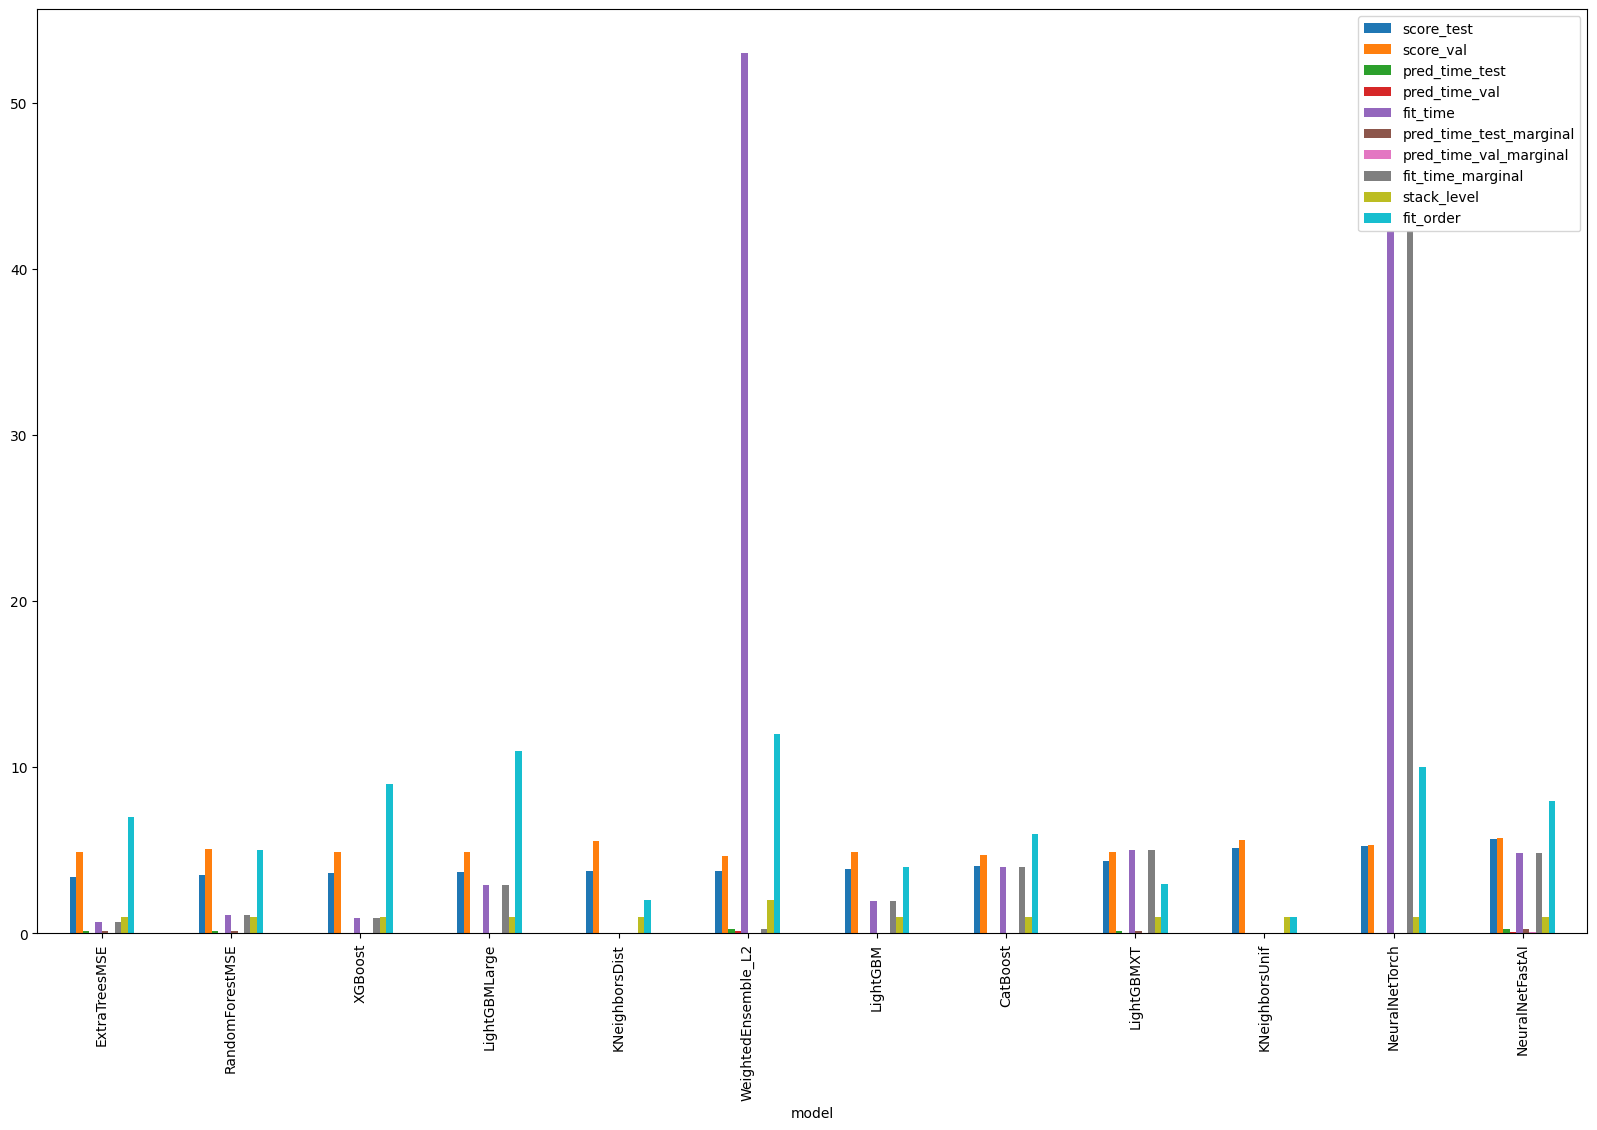

In [16]:
predictor_leaderboard.plot.bar(figsize=(20,12))
plt.savefig("直接百分比 所有指标.png", dpi=300)

In [17]:
predictor_leaderboard.columns

Index(['model', 'score_test', 'score_val', 'pred_time_test', 'pred_time_val',
       'fit_time', 'pred_time_test_marginal', 'pred_time_val_marginal',
       'fit_time_marginal', 'stack_level', 'can_infer', 'fit_order'],
      dtype='object')

In [18]:
predicitions = predictor_leaderboard.drop(columns = ['pred_time_test', 'pred_time_val',
       'fit_time','pred_time_test_marginal', 'pred_time_val_marginal',
       'fit_time_marginal', 'stack_level', 'can_infer', 'fit_order'] )
predicitions

,model,score_test,score_val
model,,,
ExtraTreesMSE,ExtraTreesMSE,3.420074,4.922723
RandomForestMSE,RandomForestMSE,3.493610,5.081393
XGBoost,XGBoost,3.627102,4.879600
LightGBMLarge,LightGBMLarge,3.693682,4.889714
KNeighborsDist,KNeighborsDist,3.754339,5.595888
WeightedEnsemble_L2,WeightedEnsemble_L2,3.754997,4.693475
LightGBM,LightGBM,3.859971,4.886850
CatBoost,CatBoost,4.092328,4.745414
LightGBMXT,LightGBMXT,4.392338,4.902053


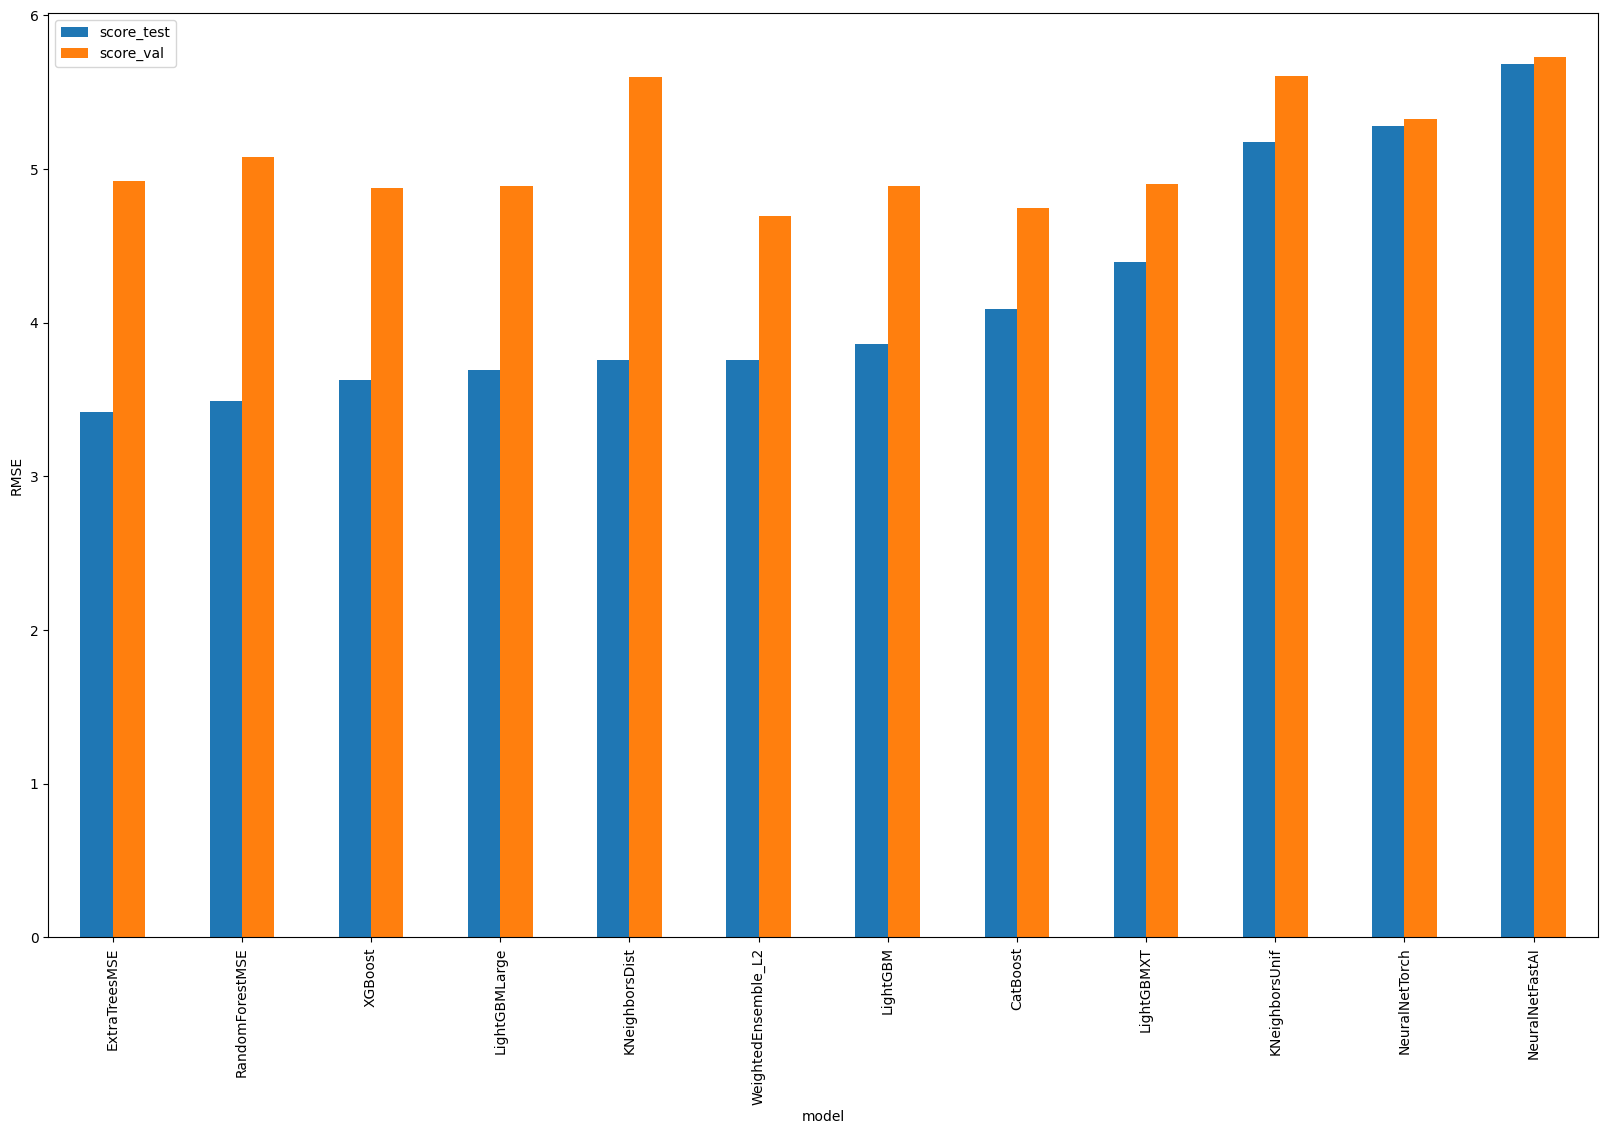

In [19]:
predicitions.plot.bar(figsize=(20,12))
plt.ylabel("RMSE")
plt.savefig("直接百分比 测试效果.png", dpi=300)

# 预测·结果图

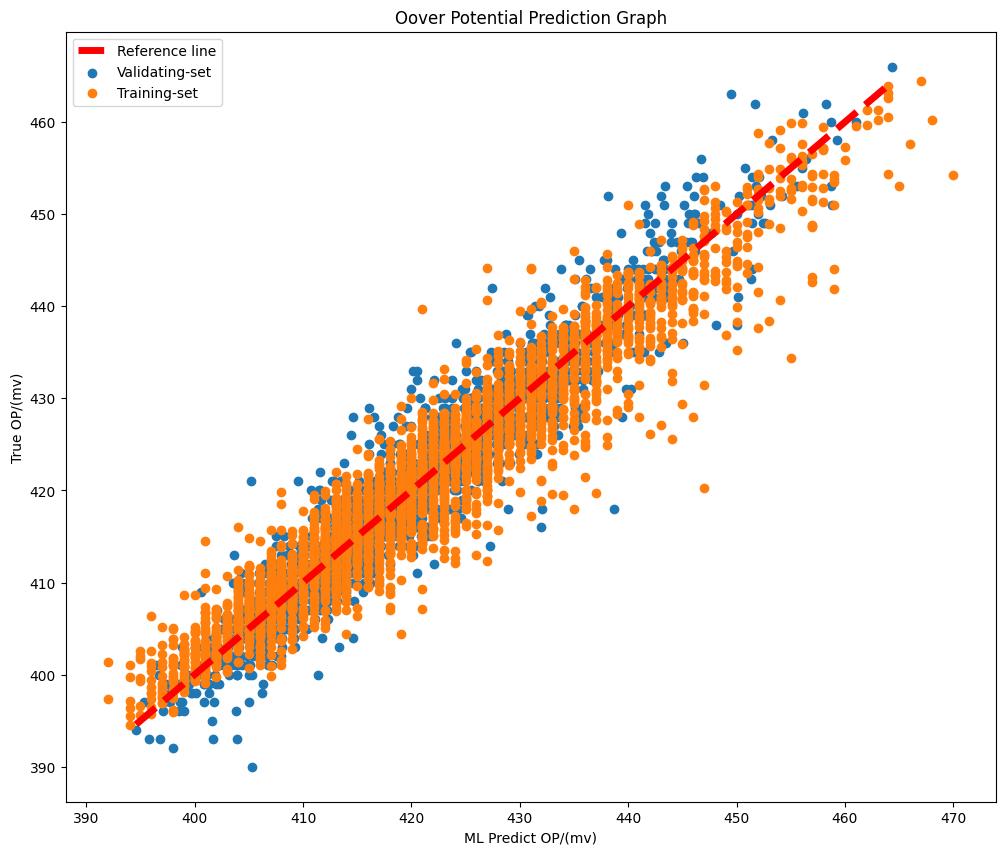

In [63]:
max_op = np.max(y_pred.values)
min_op = np.min(y_pred.values)
x = np.arange(min_op,max_op,0.01)
y = x
plt.figure(figsize=(12,10))
p0 = plt.plot(x,y,'r--',linewidth=5)
p1 = plt.scatter(y_pred.values,y_test.values)
p2 = plt.scatter(train[label].values, y_pred_train)
plt.legend(["Reference line" , "Validating-set", "Training-set"])
plt.xlabel("ML Predict OP/(mv)")
plt.ylabel("True OP/(mv)")
plt.title("Oover Potential Prediction Graph")
plt.savefig("直接百分比 预测结果.png", dpi=300)

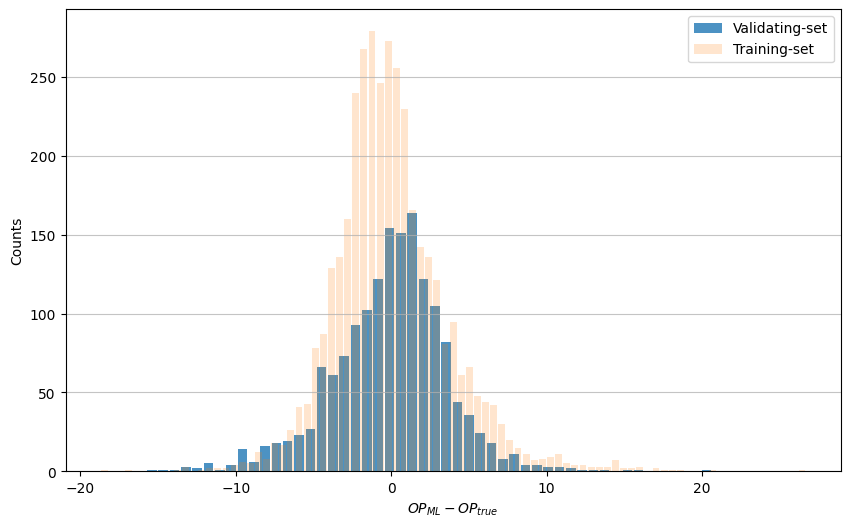

In [65]:

test_differ = y_pred.values-y_test.values
train_differ = train[label].values-y_pred_train


import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=test_differ, bins='auto',
                            alpha=0.8, rwidth=0.85)
n, bins, patches = plt.hist(x=train_differ, bins='auto',
                            alpha=0.2, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('$OP_{ML}-OP_{true}$')
plt.ylabel('Counts')
plt.legend(["Validating-set", "Training-set"])
plt.savefig("直接百分比 预测结果 hist.png", dpi=300)
# Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

# 下面用于手工feature来找到这些特征也就是前文中他给出的

| 特征        | 含义     | 计算公式       |
| ----------- | ----------- |----------- |
| VEN     | 价电子数       | 元素周期表给出  |
| RAM   | 相对原子质量      |  元素周期表给出          |
| AN     | 原子序数      |  元素周期表给出   |
| RA   | 原子半径(未成键)     |      元素周期表给出      |
| RC     | 共价半径    |     |
| FIE  | 第一电离能     |            |
| EA     | 电子亲和能      |       |
| EP  |     电负性(鲍林规模)  |     元素周期表给出       |
| DE     | 最外层d轨道电子数       |元素周期表给出       |
| δVEN     | Title       |Title       |
| δRAM   | Text        |            |
| δAN     | Title       |Title       |
| δRA   | Text        |            |
| δRC     | Title       |Title       |
| δFIE  | Text        |            |
| δEA     | Title       |Title       |
| δEP  | Text        |            |
| δDE     | Title       |Title       |
| OP     | Title       |Title       |


In [1]:
import pymatgen.core as mg

In [2]:
ni = mg.Element("Ni")
print(dir(ni))

['X', '__class__', '__doc__', '__module__', 'as_dict', 'atomic_mass', 'atomic_radius', 'average_anionic_radius', 'average_cationic_radius', 'average_ionic_radius', 'block', 'common_oxidation_states', 'data', 'electron_affinity', 'electronic_structure', 'from_Z', 'from_dict', 'from_row_and_group', 'full_electronic_structure', 'ground_state_term_symbol', 'group', 'icsd_oxidation_states', 'ionic_radii', 'ionization_energy', 'is_actinoid', 'is_alkali', 'is_alkaline', 'is_chalcogen', 'is_halogen', 'is_lanthanoid', 'is_metal', 'is_metalloid', 'is_noble_gas', 'is_post_transition_metal', 'is_quadrupolar', 'is_rare_earth_metal', 'is_transition_metal', 'is_valid_symbol', 'iupac_ordering', 'max_oxidation_state', 'metallic_radius', 'min_oxidation_state', 'name', 'nmr_quadrupole_moment', 'number', 'oxidation_states', 'print_periodic_table', 'row', 'term_symbols', 'valence', 'value']


In [9]:
ni.data

{'Atomic mass': 58.6934,
 'Atomic no': 28,
 'Atomic orbitals': {'1s': -297.870824,
  '2p': -30.868027,
  '2s': -35.312112,
  '3d': -0.348699,
  '3p': -2.594158,
  '3s': -3.950717,
  '4s': -0.210764},
 'Atomic radius': 1.35,
 'Atomic radius calculated': 1.49,
 'Boiling point': '3186 K',
 'Brinell hardness': '700 MN m<sup>-2</sup>',
 'Bulk modulus': '180 GPa',
 'Coefficient of linear thermal expansion': '13.4 x10<sup>-6</sup>K<sup>-1</sup>',
 'Common oxidation states': [2],
 'Critical temperature': 'no data K',
 'Density of solid': '8908 kg m<sup>-3</sup>',
 'Electrical resistivity': '7.2 10<sup>-8</sup> &Omega; m',
 'Electronic structure': '[Ar].3d<sup>8</sup>.4s<sup>2</sup>',
 'ICSD oxidation states': [1, 2, 3, 4],
 'Ionic radii': {'3': 0.74},
 'Ionic radii hs': {'3': 0.74},
 'Ionic radii ls': {'2': 0.83, '3': 0.7, '4': 0.62},
 'Liquid range': '1458 K',
 'Melting point': '1728 K',
 'Mendeleev no': 67,
 'Mineral hardness': '4.0',
 'Molar volume': '6.59 cm<sup>3</sup>',
 'Name': 'Nickel'

In [12]:
ni.print_periodic_table()

H                                                                   He 
Li  Be                                          B   C   N   O   F   Ne 
Na  Mg                                          Al  Si  P   S   Cl  Ar 
K   Ca  Sc  Ti  V   Cr  Mn  Fe  Co  Ni  Cu  Zn  Ga  Ge  As  Se  Br  Kr 
Rb  Sr  Y   Zr  Nb  Mo  Tc  Ru  Rh  Pd  Ag  Cd  In  Sn  Sb  Te  I   Xe 
Cs  Ba      Hf  Ta  W   Re  Os  Ir  Pt  Au  Hg  Tl  Pb  Bi  Po  At  Rn 
Fr  Ra      Rf  Db  Sg  Bh  Hs  Mt  Ds  Rg  Cn  Nh  Fl  Mc  Lv  Ts  Og 
        La  Ce  Pr  Nd  Pm  Sm  Eu  Gd  Tb  Dy  Ho  Er  Tm  Yb  Lu     
        Ac  Th  Pa  U   Np  Pu  Am  Cm  Bk  Cf  Es  Fm  Md  No  Lr     


In [16]:
for i in dir(ni):
    print(F"element.{i}",end=", ")

element.X, element.__class__, element.__doc__, element.__module__, element.as_dict, element.atomic_mass, element.atomic_radius, element.average_anionic_radius, element.average_cationic_radius, element.average_ionic_radius, element.block, element.common_oxidation_states, element.data, element.electron_affinity, element.electronic_structure, element.from_Z, element.from_dict, element.from_row_and_group, element.full_electronic_structure, element.ground_state_term_symbol, element.group, element.icsd_oxidation_states, element.ionic_radii, element.ionization_energy, element.is_actinoid, element.is_alkali, element.is_alkaline, element.is_chalcogen, element.is_halogen, element.is_lanthanoid, element.is_metal, element.is_metalloid, element.is_noble_gas, element.is_post_transition_metal, element.is_quadrupolar, element.is_rare_earth_metal, element.is_transition_metal, element.is_valid_symbol, element.iupac_ordering, element.max_oxidation_state, element.metallic_radius, element.min_oxidation_sta

In [5]:
for key , value in ni.__dict__["_data"].items():
    print(key,":")
    print(value, "\n")

Atomic mass :
58.6934 

Atomic no :
28 

Atomic orbitals :
{'1s': -297.870824, '2p': -30.868027, '2s': -35.312112, '3d': -0.348699, '3p': -2.594158, '3s': -3.950717, '4s': -0.210764} 

Atomic radius :
1.35 

Atomic radius calculated :
1.49 

Boiling point :
3186 K 

Brinell hardness :
700 MN m<sup>-2</sup> 

Bulk modulus :
180 GPa 

Coefficient of linear thermal expansion :
13.4 x10<sup>-6</sup>K<sup>-1</sup> 

Common oxidation states :
[2] 

Critical temperature :
no data K 

Density of solid :
8908 kg m<sup>-3</sup> 

Electrical resistivity :
7.2 10<sup>-8</sup> &Omega; m 

Electronic structure :
[Ar].3d<sup>8</sup>.4s<sup>2</sup> 

ICSD oxidation states :
[1, 2, 3, 4] 

Ionic radii :
{'3': 0.74} 

Ionic radii hs :
{'3': 0.74} 

Ionic radii ls :
{'2': 0.83, '3': 0.7, '4': 0.62} 

Liquid range :
1458 K 

Melting point :
1728 K 

Mendeleev no :
67 

Mineral hardness :
4.0 

Molar volume :
6.59 cm<sup>3</sup> 

Name :
Nickel 

Oxidation states :
[-1, 1, 2, 3, 4] 

Poissons ratio :
0.31 

In [23]:
def get_element_feature(element):
    element = mg.Element(element)
    #return np.array([element.valence[1], element.atomic_mass, element.Z, element.atomic_radius, element.electron_affinity])
    return np.array([element.X, element.atomic_mass, element.atomic_radius, element.average_anionic_radius, 
                     element.average_cationic_radius, element.average_ionic_radius, element.block, 
                     element.common_oxidation_states, element.electron_affinity, 
                     element.electronic_structure, element.from_Z, element.from_dict, 
                     element.from_row_and_group, element.full_electronic_structure, 
                     element.ground_state_term_symbol, element.group, 
                     element.icsd_oxidation_states, element.ionic_radii, 
                     element.ionization_energy, element.is_actinoid, 
                     element.is_alkali, element.is_alkaline, 
                     element.is_chalcogen, element.is_halogen, 
                     element.is_lanthanoid, element.is_metal, 
                     element.is_metalloid, element.is_noble_gas, 
                     element.is_post_transition_metal, element.is_quadrupolar, element.is_rare_earth_metal, 
                     element.is_transition_metal, element.is_valid_symbol, element.iupac_ordering, 
                     element.max_oxidation_state, element.metallic_radius, element.min_oxidation_state, 
                     element.name, element.nmr_quadrupole_moment, element.number, element.oxidation_states, 
                     element.print_periodic_table, element.row, element.term_symbols, element.valence, element.value])
get_element_feature("Ni")

C:\Users\23174\AppData\Local\Temp\ipykernel_24732\4074478079.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([element.X, element.atomic_mass, element.atomic_radius, element.average_anionic_radius,


array([1.91, 58.6934, 1.35, 0.0, 0.74, 0.74, 'd', (2,), 1.1571612,
       '[Ar].3d8.4s2',
       <function ElementBase.from_Z at 0x000001D3D798DB80>,
       <function ElementBase.from_dict at 0x000001D3D7990820>,
       <function ElementBase.from_row_and_group at 0x000001D3D798DC10>,
       list([(1, 's', 2), (2, 's', 2), (2, 'p', 6), (3, 's', 2), (3, 'p', 6), (3, 'd', 8), (4, 's', 2)]),
       '3F4.0', 10, (1, 2, 3, 4), {3: 0.74}, 7.639878, False, False,
       False, False, False, False, True, False, False, False, True, False,
       True, <function ElementBase.is_valid_symbol at 0x000001D3D798DCA0>,
       70, 4, 1.246, -1, 'Ni', {'Ni-61': 162.15}, 28, (-1, 1, 2, 3, 4),
       <function ElementBase.print_periodic_table at 0x000001D3D7990940>,
       4,
       list([['1G4.0'], ['3F2.0', '3F3.0', '3F4.0'], ['1D2.0'], ['3P0.0', '3P1.0', '3P2.0'], ['1S0.0']]),
       (2, 8), 'Ni'], dtype=object)

In [8]:
ni.valence[1]

8

In [5]:
ni.atomic_mass

58.6934

In [6]:
ni.Z

28

In [7]:
ni.atomic_radius

1.35

In [4]:
ni.electron_affinity

1.1571612

In [236]:
def get_element_feature(element):
    element = mg.Element(element)
    #return np.array([element.valence[1], element.atomic_mass, element.Z, element.atomic_radius, element.electron_affinity])
    return np.array([element.atomic_mass, element.Z, element.atomic_radius, element.electron_affinity])

In [237]:
train_data = pd.read_excel("../../数据/配比.xlsx", dtype="float64")
train_data

,Ni,Co,Fe,Overpotential(mV)
0,1.000,0.000,0.000,441.0
1,0.969,0.000,0.031,426.0
2,0.969,0.031,0.000,423.0
3,0.929,0.000,0.071,420.0
4,0.929,0.031,0.031,422.0
...,...,...,...,...
491,0.000,0.871,0.129,437.0
492,0.000,0.898,0.102,438.0
493,0.000,0.929,0.071,440.0
494,0.000,0.969,0.031,442.0


In [239]:
def append_data_to_save(data_to_save, tempt_list, ):
    tempt_dic = {}
    for k,v in zip([ "atomic mass", "Z","atomic radius", "electron_affinity", "OverPotential"],tempt_list):

    #for k,v in zip(["valence", "atomic mass", "Z","atomic radius", "electron_affinity", "OverPotential"],tempt_list):
        tempt_dic[k] = v
    data_to_save.loc[data_to_save.size] = tempt_dic
    return data_to_save

In [290]:
#feature_data = pd.DataFrame(columns=["valence", "atomic mass", "Z","atomic radius", "electron_affinity", "OverPotential"])
feature_data = pd.DataFrame(columns=[ "atomic mass", "Z","atomic radius", "electron_affinity", "OverPotential"])
feature_data
index = 0
for index, row in train_data.iterrows():
    Ni_ratio = row["Ni"]
    Co_ratio = row["Co"]
    Fe_ratio = row["Fe"]
    OP = row["Overpotential(mV)"]
    if Ni_ratio<0.4 :
        pass 
    else :

        features = np.hstack((get_element_feature("Ni")*Ni_ratio+get_element_feature("Co")*Co_ratio+get_element_feature("Fe")*Fe_ratio, np.array([OP])))
        features = append_data_to_save(feature_data, features)
        index+=1
        #print(features)
feature_data

,atomic mass,Z,atomic radius,electron_affinity,OverPotential
0,58.693400,28.000,1.35000,1.157161,441.0
5,58.605100,27.938,1.35155,1.126040,426.0
10,58.700834,27.969,1.35000,1.141819,423.0
15,58.491164,27.858,1.35355,1.085883,420.0
20,58.084293,27.655,1.33940,1.100283,422.0
...,...,...,...,...,...
925,57.080094,26.831,1.37845,0.570586,408.0
930,56.984360,26.800,1.38000,0.554806,412.0
935,58.829843,27.431,1.35000,0.875565,420.0
940,58.203711,27.157,1.33940,0.853825,421.0


In [291]:
feature_data.describe()

,atomic mass,Z,atomic radius,electron_affinity,OverPotential
count,190.000000,190.000000,190.000000,190.000000,190.000000
mean,58.190255,27.408474,1.360452,0.857443,414.089474
std,0.537239,0.299505,0.009937,0.133342,11.929573
min,56.665789,26.659000,1.338900,0.554806,392.000000
25%,57.809177,27.209750,1.353550,0.762998,405.000000
50%,58.212112,27.429000,1.360000,0.858001,413.000000
75%,58.654261,27.631000,1.368450,0.951796,421.000000
max,59.367121,28.151000,1.391100,1.157161,459.000000


In [292]:
from autogluon.tabular import TabularDataset, TabularPredictor
import numpy as np
import pandas as pd
from sklearn.utils import shuffle as reset
def train_test_split(data, test_size=0.3, shuffle=True, random_state=None):
    '''Split DataFrame into random train and test subsets
    
    Parameters
    ----------
    data : pandas dataframe, need to split dataset.
    
    test_size : float
        If float, should be between 0.0 and 1.0 and represent the
        proportion of the dataset to include in the train split.
        
    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.
        
    shuffle : boolean, optional (default=None)
        Whether or not to shuffle the data before splitting. If shuffle=False
        then stratify must be None.
    '''

    if shuffle:
        data = reset(data, random_state=random_state)
	
    train = data[int(len(data)*test_size):].reset_index(drop = True)
    test  = data[:int(len(data)*test_size)].reset_index(drop = True)
    
    return train, test

In [293]:
train , test = train_test_split(feature_data, test_size=0.3)
train = feature_data

In [294]:
label = "OverPotential"
save = "Tempt1"

In [295]:
predictor = TabularPredictor(label=label , path=save).fit(train)

Beginning AutoGluon training ...
AutoGluon will save models to "Tempt1\"
AutoGluon Version:  0.4.0
Python Version:     3.9.7
Operating System:   Windows
Train Data Rows:    190
Train Data Columns: 4
Label Column: OverPotential
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (459.0, 392.0, 414.08947, 11.92957)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1384.91 MB
	Train Data (Original)  Memory Usage: 0.01 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtype

In [296]:
#feature_data = pd.DataFrame(columns=["valence", "atomic mass", "Z","atomic radius", "electron_affinity", "OverPotential"])
feature_data = pd.DataFrame(columns=[ "atomic mass", "Z","atomic radius", "electron_affinity", "OverPotential"])
feature_data
index = 0
for index, row in train_data.iterrows():
    Ni_ratio = row["Ni"]
    Co_ratio = row["Co"]
    Fe_ratio = row["Fe"]
    OP = row["Overpotential(mV)"]

    features = np.hstack((get_element_feature("Ni")*Ni_ratio+get_element_feature("Co")*Co_ratio+get_element_feature("Fe")*Fe_ratio, np.array([OP])))
    features = append_data_to_save(feature_data, features)
    index+=1
    #print(features)
feature_data
train , test = train_test_split(feature_data, test_size=0.3)

In [297]:
test_nolabel = test.drop(columns = [label])
test_nolabel


,atomic mass,Z,atomic radius,electron_affinity
0,58.702621,27.637,1.36050,0.925273
1,56.936030,26.677,1.39050,0.441693
2,57.039753,26.569,1.38000,0.440485
3,58.211834,26.908,1.37050,0.561667
4,57.968529,26.941,1.38570,0.512110
...,...,...,...,...
143,58.645625,27.769,1.35155,1.042402
144,57.793651,26.631,1.36845,0.474433
145,58.084293,27.655,1.33940,1.100283
146,58.894273,27.268,1.35895,0.743094


In [298]:
train_nolabel = train.drop(columns = [label])
train_nolabel.head()


,atomic mass,Z,atomic radius,electron_affinity
0,58.383137,27.179,1.36695,0.696787
1,58.710425,27.929,1.35000,1.122024
2,58.749482,27.551,1.38110,0.766024
3,56.673913,26.410,1.39540,0.308171
4,58.131843,27.351,1.39110,0.664218


In [299]:
y_test = test[label]
y_train = train[label]

In [300]:
predictor = TabularPredictor.load(save)
y_pred = predictor.predict(test_nolabel)
y_pred_train = predictor.predict(train_nolabel)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: root_mean_squared_error on test data: -22.138950937613014
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -22.138950937613014,
    "mean_squared_error": -490.13314861803616,
    "mean_absolute_error": -16.66477780728727,
    "r2": -1.5730500790257254,
    "pearsonr": 0.047758251943505886,
    "median_absolute_error": -13.97894287109375
}


In [301]:
predictor_leaderboard = predictor.leaderboard(test,silent=True)
predictor_leaderboard = predictor_leaderboard.set_index(predictor_leaderboard ["model"])

In [302]:


predictor_leaderboard.loc[:,"score_val"] = -predictor_leaderboard.loc[:,"score_val"]
predictor_leaderboard.loc[:,"score_test"] = -predictor_leaderboard.loc[:,"score_test"]
predictor_leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
model,,,,,,,,,,,,
KNeighborsDist,KNeighborsDist,21.307386,7.728030,0.007978,0.005983,0.003988,0.007978,0.005983,0.003988,1,True,2
KNeighborsUnif,KNeighborsUnif,21.512607,7.555339,0.008976,0.007978,0.005981,0.008976,0.007978,0.005981,1,True,1
LightGBMLarge,LightGBMLarge,21.543565,6.106808,0.003990,0.004989,4.745308,0.003990,0.004989,4.745308,1,True,11
ExtraTreesMSE,ExtraTreesMSE,21.751603,7.014675,0.083777,0.043885,0.548539,0.083777,0.043885,0.548539,1,True,7
CatBoost,CatBoost,21.769699,6.284894,0.002992,0.002992,0.940498,0.002992,0.002992,0.940498,1,True,6
NeuralNetFastAI,NeuralNetFastAI,22.046898,5.253119,0.046874,0.019948,2.938177,0.046874,0.019948,2.938177,1,True,8
WeightedEnsemble_L2,WeightedEnsemble_L2,22.138951,5.013776,0.075798,0.032912,11.630979,0.004987,0.000000,0.464763,2,True,12
LightGBM,LightGBM,22.227822,6.097545,0.002992,0.004986,1.883985,0.002992,0.004986,1.883985,1,True,4
NeuralNetTorch,NeuralNetTorch,22.432910,5.174520,0.016955,0.005985,3.117700,0.016955,0.005985,3.117700,1,True,10


<AxesSubplot:xlabel='model'>

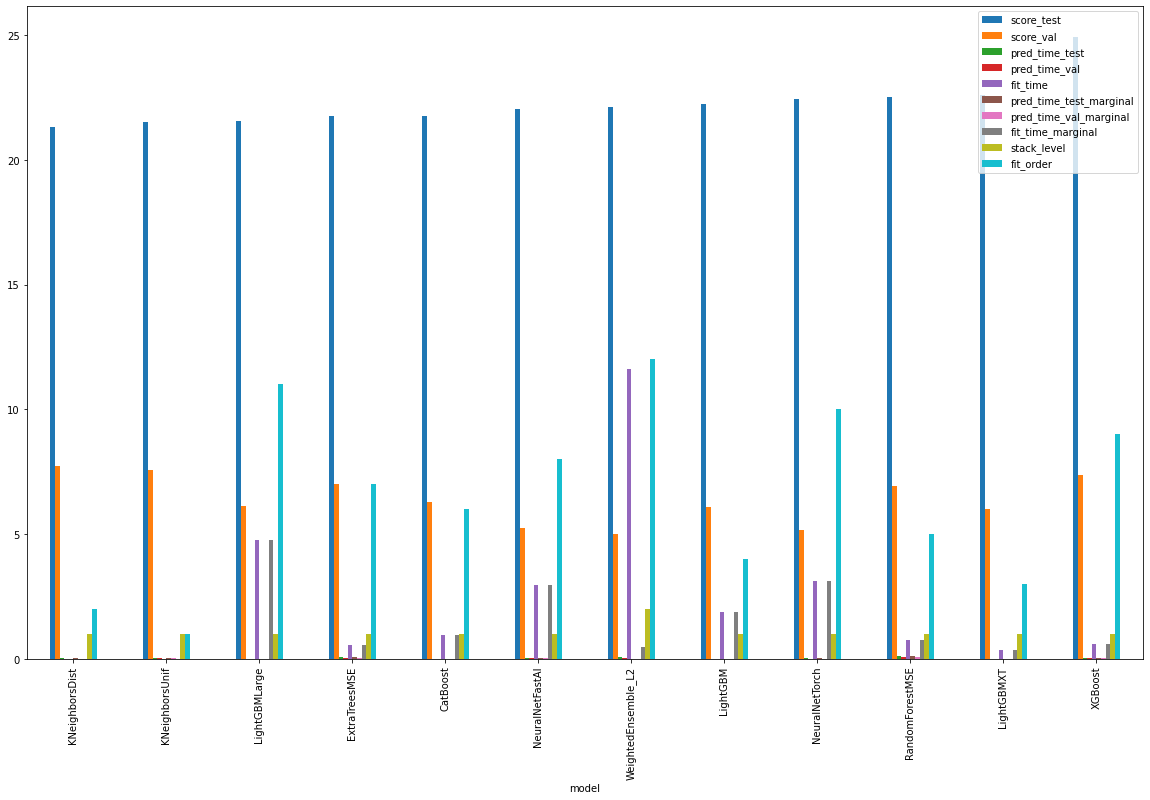

In [303]:

predictor_leaderboard.plot.bar(figsize=(20,12))
#plt.savefig("所有指标 improved.png", dpi=300)

In [304]:
predicitions = predictor_leaderboard.drop(columns = ['pred_time_test', 'pred_time_val',
       'fit_time','pred_time_test_marginal', 'pred_time_val_marginal',
       'fit_time_marginal', 'stack_level', 'can_infer', 'fit_order'] )
predicitions

,model,score_test,score_val
model,,,
KNeighborsDist,KNeighborsDist,21.307386,7.728030
KNeighborsUnif,KNeighborsUnif,21.512607,7.555339
LightGBMLarge,LightGBMLarge,21.543565,6.106808
ExtraTreesMSE,ExtraTreesMSE,21.751603,7.014675
CatBoost,CatBoost,21.769699,6.284894
NeuralNetFastAI,NeuralNetFastAI,22.046898,5.253119
WeightedEnsemble_L2,WeightedEnsemble_L2,22.138951,5.013776
LightGBM,LightGBM,22.227822,6.097545
NeuralNetTorch,NeuralNetTorch,22.432910,5.174520


Text(0, 0.5, 'RMSE')

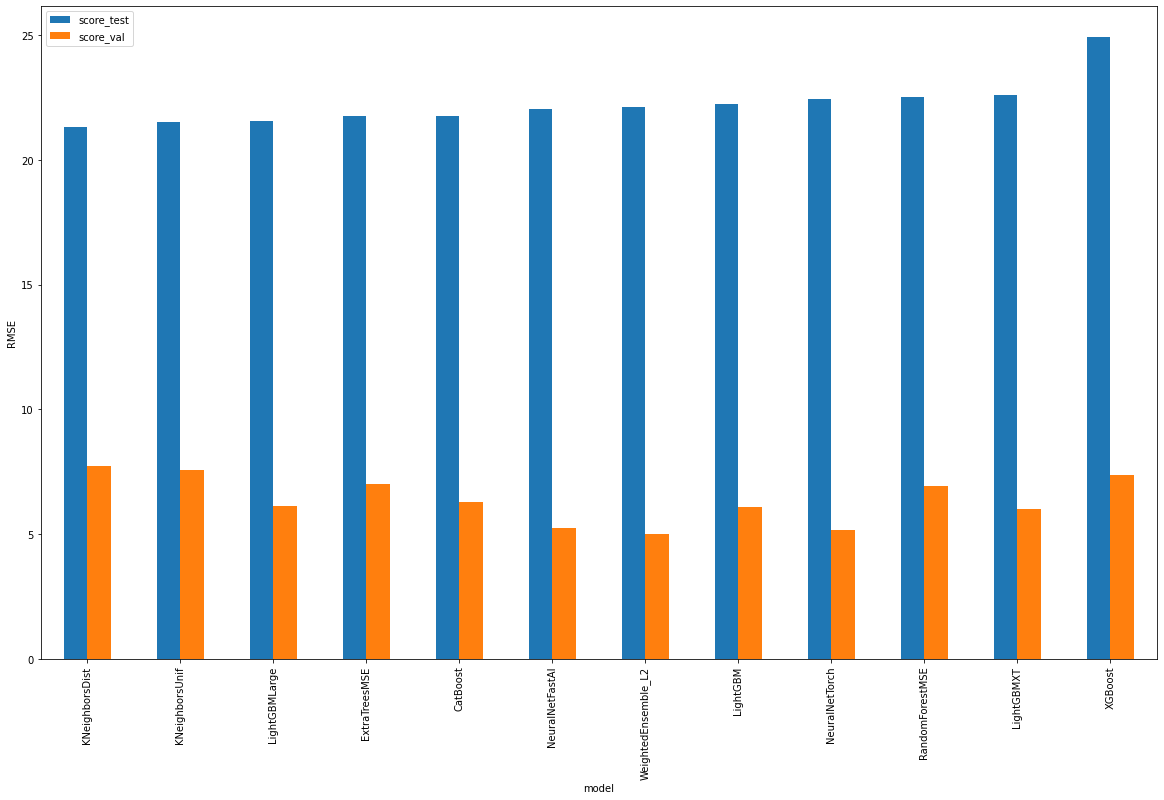

In [305]:
predicitions.plot.bar(figsize=(20,12))
plt.ylabel("RMSE")
#plt.savefig("测试效果 imporved.png", dpi=300)

Text(0.5, 1.0, 'Oover Potential Prediction Graph')

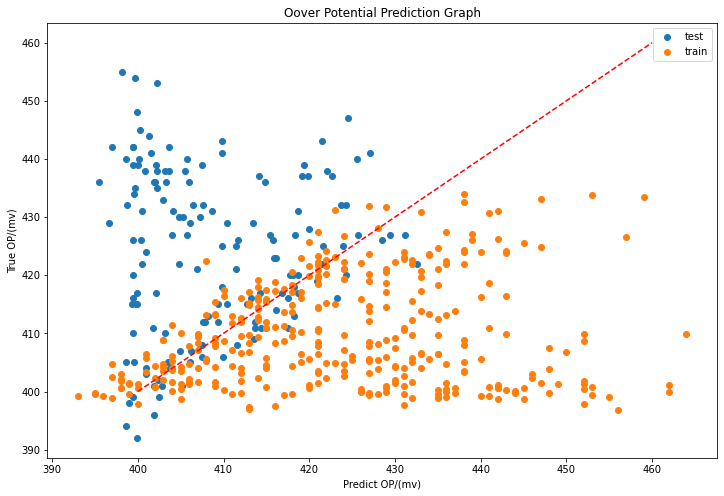

In [306]:
x = np.arange(400,460,0.01)
y = x
plt.figure(figsize=(12,8))
plt.plot(x,y,'r--')
p1 = plt.scatter(y_pred.values,y_test.values)
p2 = plt.scatter(train[label].values, y_pred_train)
plt.legend([p1, p2],[ "test", "train"])
plt.xlabel("Predict OP/(mv)")
plt.ylabel("True OP/(mv)")
plt.title("Oover Potential Prediction Graph")
#plt.savefig("预测结果 improved.png", dpi=300)

# 应用该模型到四元看看

In [187]:
df = pd.read_excel("E:\桌面\毕业设计\MachineLearningOER\数据\四元数据_修正.xlsx", dtype="float64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5330 entries, 0 to 5329
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ni           5330 non-null   float64
 1   Fe           5330 non-null   float64
 2   Co           5330 non-null   float64
 3   Ce           5330 non-null   float64
 4   3mA cm‐2     5330 non-null   float64
 5   10 mA cm‐2   5330 non-null   float64
dtypes: float64(6)
memory usage: 250.0 KB


In [188]:
df.describe()

,Ni,Fe,Co,Ce,3mA cm‐2,10 mA cm‐2
count,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000
mean,0.252833,0.251426,0.252274,0.244253,397.499437,420.641463
std,0.205460,0.205573,0.205725,0.197814,18.990227,13.120612
min,0.000000,0.000000,0.000000,0.000000,277.000000,390.000000
25%,0.102000,0.071000,0.102000,0.071000,387.000000,411.000000
50%,0.200000,0.200000,0.200000,0.200000,399.000000,419.000000
75%,0.369000,0.369000,0.369000,0.369000,411.000000,429.000000
max,1.000000,1.000000,1.000000,0.898000,440.000000,470.000000


In [189]:
df.columns

Index(['Ni', 'Fe', 'Co', 'Ce', '3mA cm‐2 ', '10 mA cm‐2 '], dtype='object')

In [228]:
feature_data_four = pd.DataFrame(columns=["atomic mass", "Z","atomic radius", "electron_affinity", "10 mA cm‐2 "])

#feature_data_four = pd.DataFrame(columns=["valence", "atomic mass", "Z","atomic radius", "electron_affinity", "10 mA cm‐2 "])
feature_data_four # 四元的

,atomic mass,Z,atomic radius,electron_affinity,10 mA cm‐2


In [229]:
def append_data_to_save(data_to_save, tempt_list, ):
    tempt_dic = {}
    for k,v in zip([ "atomic mass", "Z","atomic radius", "electron_affinity", "10 mA cm‐2 "],tempt_list):

    #for k,v in zip(["valence", "atomic mass", "Z","atomic radius", "electron_affinity", "10 mA cm‐2 "],tempt_list):
        tempt_dic[k] = v
    data_to_save.loc[data_to_save.size] = tempt_dic
    return data_to_save

In [230]:
index = 0
for index, row in df.iterrows():
    Ni_ratio = row["Ni"]
    Co_ratio = row["Co"]
    Fe_ratio = row["Fe"]
    Ce_ratio = row["Ce"]
    OP = row["10 mA cm‐2 "] # 10mA
    if Ce_ratio != 0:
        pass 
    else:
        features = np.hstack((get_element_feature("Ni")*Ni_ratio+get_element_feature("Co")*Co_ratio+get_element_feature("Fe")*Fe_ratio, np.array([OP])))
        feature_data_four = append_data_to_save(feature_data_four, features)
        index+=1

    #print(features)
feature_data_four

,atomic mass,Z,atomic radius,electron_affinity,10 mA cm‐2
0,58.693400,28.000,1.35000,1.157161,441.0
5,58.605100,27.938,1.35155,1.126040,426.0
10,58.700834,27.969,1.35000,1.141819,423.0
15,58.491164,27.858,1.35355,1.085883,420.0
20,58.084293,27.655,1.33940,1.100283,422.0
...,...,...,...,...,...
2375,58.534818,26.871,1.35645,0.596600,437.0
2380,58.618199,26.898,1.35510,0.610344,438.0
2385,58.713933,26.929,1.35355,0.626124,440.0
2390,58.837461,26.969,1.35155,0.646485,442.0


In [231]:
feature_data_four.describe()

,atomic mass,Z,atomic radius,electron_affinity,10 mA cm‐2
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,57.879447,27.031675,1.366782,0.667577,422.770833
std,0.775917,0.440442,0.013903,0.211286,13.593164
min,55.805573,25.957000,1.338900,0.153236,392.000000
25%,57.299494,26.731250,1.356450,0.522941,412.000000
50%,58.044618,27.038500,1.366075,0.669421,422.500000
75%,58.495369,27.345000,1.375700,0.820350,433.000000
max,59.463039,28.151000,1.411100,1.157161,459.000000


In [232]:
test = feature_data_four
label = "10 mA cm‐2 "
test_nolabel = test.drop(columns = ["10 mA cm‐2 "])
test_nolabel


,atomic mass,Z,atomic radius,electron_affinity
0,58.693400,28.000,1.35000,1.157161
5,58.605100,27.938,1.35155,1.126040
10,58.700834,27.969,1.35000,1.141819
15,58.491164,27.858,1.35355,1.085883
20,58.084293,27.655,1.33940,1.100283
...,...,...,...,...
2375,58.534818,26.871,1.35645,0.596600
2380,58.618199,26.898,1.35510,0.610344
2385,58.713933,26.929,1.35355,0.626124
2390,58.837461,26.969,1.35155,0.646485


In [233]:
y_test = test[label]
y_test


0       441.0
5       426.0
10      423.0
15      420.0
20      422.0
        ...  
2375    437.0
2380    438.0
2385    440.0
2390    442.0
2395    436.0
Name: 10 mA cm‐2 , Length: 480, dtype: float64

In [234]:
predictor = TabularPredictor.load(save)
y_pred = predictor.predict(test_nolabel)
y_pred_train = predictor.predict(train_nolabel)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: root_mean_squared_error on test data: -5.372903099224761
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -5.372903099224761,
    "mean_squared_error": -28.868087713659044,
    "mean_absolute_error": -4.072839800516764,
    "r2": 0.8434393356529832,
    "pearsonr": 0.9186968320469878,
    "median_absolute_error": -3.1424713134765625
}


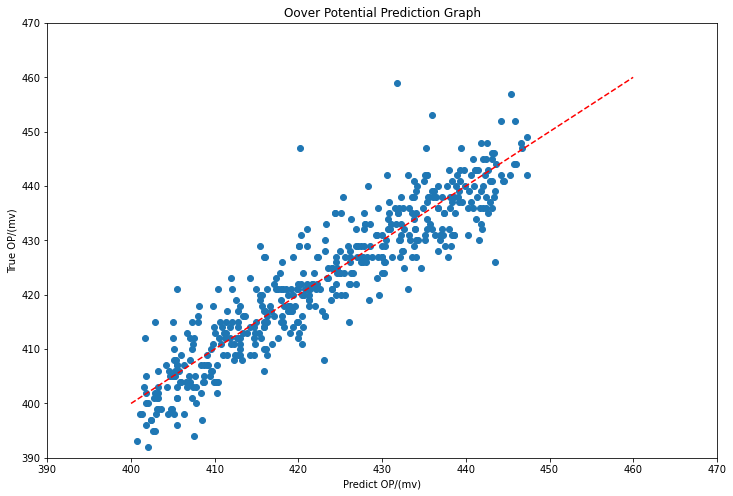

In [235]:
x = np.arange(400,460,0.01)
y = x
plt.figure(figsize=(12,8))
plt.xlim(390, 470)
plt.ylim(390, 470)
plt.plot(x,y,'r--')
p1 = plt.scatter(y_pred.values,y_test.values)

plt.xlabel("Predict OP/(mv)")
plt.ylabel("True OP/(mv)")
plt.title("Oover Potential Prediction Graph")
plt.savefig("预测结果 improved.png", dpi=300)

# 绘图

##  各个模型的预测效果图

In [132]:
predicitions = pd.DataFrame(predicitions, index=[i for i in predicitions["model"].values])
predicitions

,model,score_test,score_val
ExtraTreesMSE,ExtraTreesMSE,6.019490e+00,5.773924
LightGBMXT,LightGBMXT,6.274595e+00,6.251878
LightGBMLarge,LightGBMLarge,6.392802e+00,7.034210
CatBoost,CatBoost,6.435967e+00,6.218969
RandomForestMSE,RandomForestMSE,6.480979e+00,6.072065
WeightedEnsemble_L2,WeightedEnsemble_L2,6.483472e+00,5.444529
LightGBM,LightGBM,6.497182e+00,6.273338
NeuralNetTorch,NeuralNetTorch,7.317346e+00,5.603535
XGBoost,XGBoost,7.976532e+00,6.959762
KNeighborsDist,KNeighborsDist,8.714210e+00,7.082393


Text(0.5, 1.0, 'RMSE for both test and validation dataset')

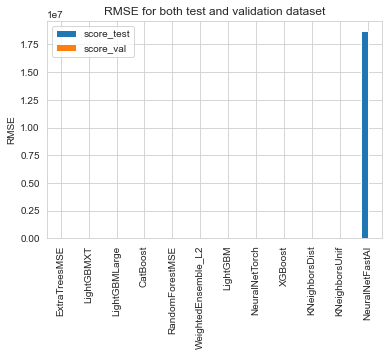

In [135]:
predicitions = pd.DataFrame(predicitions, index=[i for i in predicitions["model"].values])
predicitions.plot.bar()#(figsize=(20,12))#, index=[i for i in predicitions["model"].values])
plt.ylabel("RMSE")
plt.title("RMSE for both test and validation dataset")

<AxesSubplot:>

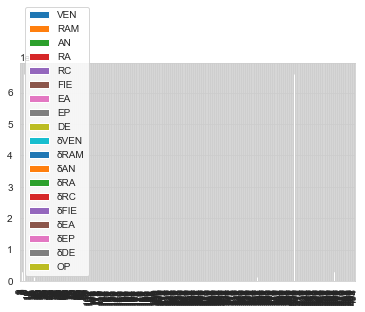

In [136]:
data.plot.bar()

### 相关性图

C:\Users\admin\AppData\Local\Temp\ipykernel_11696\2714896359.py:22: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.triu(np.ones_like(dcorr,dtype=np.bool)),#显示对脚线下面部分图


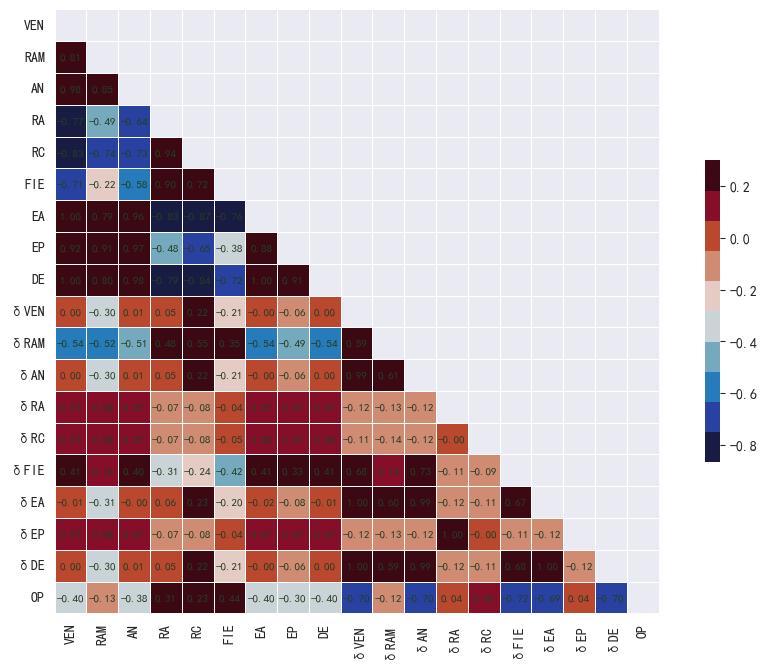

In [108]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import palettable
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
data = pd.read_csv("../数据/ManualFeature.csv", dtype="float32")
data.columns = ['VEN', 'RAM', 'AN', 'RA', 'RC', 'FIE', 'EA', 'EP', 'DE', 'δVEN', 'δRAM', 'δAN','δRA', 'δRC', 'δFIE', 'δEA', 'δEP', 'δDE', 'OP']
# corr函数计算相关性矩阵(correlation matrix)
dcorr = data.corr()#(method='pearson')#默认为'pearson'检验，可选'kendall','spearman'
plt.figure(figsize=(12, 8),dpi=100)
sns.heatmap(data=dcorr,
            vmax=0.3, 
            cmap=palettable.cmocean.diverging.Balance_10.mpl_colors,
            annot=True,
            fmt=".2f",
            annot_kws={'size':8,'weight':'normal', 'color':'#253D24'},
            mask=np.triu(np.ones_like(dcorr,dtype=np.bool)),#显示对脚线下面部分图
            square=True, linewidths=.5,#每个方格外框显示，外框宽度设置
            cbar_kws={"shrink": .5}
           )
plt.savefig("皮尔逊 热力图.png",dpi=300)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VEN     495 non-null    float32
 1   RAM     495 non-null    float32
 2   AN      495 non-null    float32
 3   RA      495 non-null    float32
 4   RC      495 non-null    float32
 5   FIE     495 non-null    float32
 6   EA      495 non-null    float32
 7   EP      495 non-null    float32
 8   DE      495 non-null    float32
 9   δVEN    495 non-null    float32
 10  δRAM    495 non-null    float32
 11  δAN     495 non-null    float32
 12  δRA     495 non-null    float32
 13  δRC     495 non-null    float32
 14  δFIE    495 non-null    float32
 15  δEA     495 non-null    float32
 16  δEP     495 non-null    float32
 17  δDE     495 non-null    float32
 18  OP      495 non-null    float32
dtypes: float32(19)
memory usage: 36.9 KB


In [110]:
data.corr()

,VEN,RAM,AN,RA,RC,FIE,EA,EP,DE,δVEN,δRAM,δAN,δRA,δRC,δFIE,δEA,δEP,δDE,OP
VEN,1.000000,0.807938,0.980685,-0.774693,-0.830930,-0.711102,0.996119,0.918018,0.999446,0.002932,-0.538213,0.004337,0.073329,0.074874,0.409863,-0.009423,0.073329,0.002775,-0.396646
RAM,0.807938,1.000000,0.846879,-0.486207,-0.737355,-0.216172,0.785439,0.911602,0.801257,-0.301850,-0.521661,-0.296332,0.078077,0.079722,0.160629,-0.311672,0.078077,-0.302083,-0.126166
AN,0.980685,0.846879,1.000000,-0.636795,-0.731364,-0.580278,0.959770,0.973869,0.976001,0.007100,-0.512637,0.008505,0.069249,0.070708,0.397863,-0.004777,0.069249,0.006946,-0.379771
RA,-0.774693,-0.486207,-0.636795,1.000000,0.936632,0.901874,-0.827333,-0.483263,-0.787325,0.052115,0.480155,0.050645,-0.068223,-0.069661,-0.308658,0.062462,-0.068223,0.052241,0.313201
RC,-0.830930,-0.737355,-0.731364,0.936632,1.000000,0.715017,-0.868513,-0.646768,-0.839084,0.219734,0.554957,0.215747,-0.082159,-0.083890,-0.236120,0.230631,-0.082159,0.219929,0.225475
FIE,-0.711102,-0.216172,-0.580278,0.901874,0.715017,1.000000,-0.757136,-0.381434,-0.723614,-0.209511,0.352164,-0.207342,-0.044219,-0.045151,-0.420920,-0.200125,-0.044219,-0.209477,0.438927
EA,0.996119,0.785439,0.959770,-0.827333,-0.868513,-0.757136,1.000000,0.882761,0.997413,-0.004759,-0.544938,-0.003290,0.074658,0.076232,0.407027,-0.017175,0.074658,-0.004916,-0.395848
EP,0.918018,0.911602,0.973869,-0.483263,-0.646768,-0.381434,0.882761,1.000000,0.909610,-0.064192,-0.490981,-0.061712,0.067763,0.069191,0.328835,-0.075129,0.067763,-0.064368,-0.302559
DE,0.999446,0.801257,0.976001,-0.787325,-0.839084,-0.723614,0.997413,0.909610,1.000000,0.002112,-0.539103,0.003896,0.074034,0.075594,0.410971,-0.010303,0.074034,0.001937,-0.396956
δVEN,0.002932,-0.301850,0.007100,0.052115,0.219734,-0.209511,-0.004759,-0.064192,0.002112,1.000000,0.586484,0.993080,-0.122463,-0.114787,0.681502,0.999762,-0.122463,0.999983,-0.700499


C:\Users\admin\AppData\Local\Temp\ipykernel_11696\2003944317.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.triu(np.ones_like(dcorr,dtype=np.bool)),#显示对脚线下面部分图


<Figure size 1000x1000 with 0 Axes>

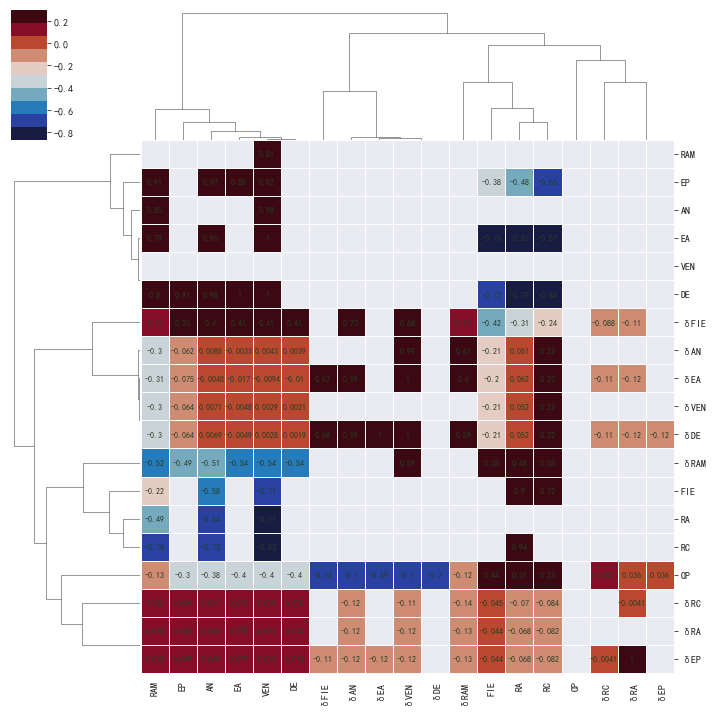

In [117]:
plt.figure(figsize=(10, 10),dpi=100)
sns.clustermap(data=dcorr,
               vmax=0.3,
               annot=True,
               cmap=palettable.cmocean.diverging.Balance_10.mpl_colors,
               linewidths=.75,
               annot_kws={'size':8,'weight':'normal', 'color':'#253D24'},
               mask=np.triu(np.ones_like(dcorr,dtype=np.bool)),#显示对脚线下面部分图
               square=True,
               cbar_kws={"shrink": .5}
                              
              )
plt.savefig("皮尔逊 聚类图.png",dpi=300)

# 基于matminer来测试一下

In [7]:
df = train_data.copy()
df.head()

,Ni,Fe,Co,Ce,3mA cm‐2,10 mA cm‐2
0,1.000,0.000,0.000,0.0,426.0,441.0
1,0.969,0.031,0.000,0.0,414.0,426.0
2,0.969,0.000,0.031,0.0,412.0,423.0
3,0.929,0.071,0.000,0.0,411.0,420.0
4,0.929,0.031,0.031,0.0,412.0,422.0


In [32]:
df["formula"] = 1

In [36]:
for index, row in df.iterrows():
    ni_fraction = row["Ni"]
    fe_fraction = row["Fe"]
    co_fraction = row["Co"]
    ce_fraction = row["Ce"]
    conte = f"Ni{ni_fraction}Fe{fe_fraction}Co{co_fraction}Ce{ce_fraction}"
    row.loc["formula"] = conte
    df.iloc[index] = row
    #print() # 输出每行的索引值

In [37]:
df

,Ni,Fe,Co,Ce,3mA cm‐2,10 mA cm‐2,formula
0,1.000,0.000,0.000,0.000,426.0,441.0,Ni1.0Fe0.0Co0.0Ce0.0
1,0.969,0.031,0.000,0.000,414.0,426.0,Ni0.969Fe0.031Co0.0Ce0.0
2,0.969,0.000,0.031,0.000,412.0,423.0,Ni0.969Fe0.0Co0.031Ce0.0
3,0.929,0.071,0.000,0.000,411.0,420.0,Ni0.929Fe0.071Co0.0Ce0.0
4,0.929,0.031,0.031,0.000,412.0,422.0,Ni0.929Fe0.031Co0.031Ce0.0
...,...,...,...,...,...,...,...
5325,0.129,0.031,0.031,0.800,433.0,463.0,Ni0.129Fe0.031Co0.031Ce0.8
5326,0.169,0.000,0.031,0.800,431.0,470.0,Ni0.169Fe0.0Co0.031Ce0.8
5327,0.031,0.000,0.071,0.898,432.0,464.0,Ni0.031Fe0.0Co0.071Ce0.898
5328,0.000,0.031,0.071,0.898,431.0,458.0,Ni0.0Fe0.031Co0.071Ce0.898


In [38]:
from matminer.featurizers.conversions import StrToComposition
df = StrToComposition().featurize_dataframe(df, "formula")
df.head()

StrToComposition:   0%|          | 0/5330 [00:00<?, ?it/s]

,Ni,Fe,Co,Ce,3mA cm‐2,10 mA cm‐2,formula,composition
0,1.000,0.000,0.000,0.0,426.0,441.0,Ni1.0Fe0.0Co0.0Ce0.0,(Ni)
1,0.969,0.031,0.000,0.0,414.0,426.0,Ni0.969Fe0.031Co0.0Ce0.0,"(Ni, Fe)"
2,0.969,0.000,0.031,0.0,412.0,423.0,Ni0.969Fe0.0Co0.031Ce0.0,"(Ni, Co)"
3,0.929,0.071,0.000,0.0,411.0,420.0,Ni0.929Fe0.071Co0.0Ce0.0,"(Ni, Fe)"
4,0.929,0.031,0.031,0.0,412.0,422.0,Ni0.929Fe0.031Co0.031Ce0.0,"(Ni, Fe, Co)"


In [ ]:
df.to_excel(r"C:\Users\23174\Desktop\GitHub项目\毕设\MachineLearningOER\数据\四元数据添加formula.xlsx")

In [39]:
%%time
from matminer.featurizers.composition import ElementProperty
ep_feat = ElementProperty.from_preset(preset_name="magpie")
df = ep_feat.featurize_dataframe(df, col_id="composition")  # input the "composition" column to the featurizer
df.head()

ElementProperty:   0%|          | 0/5330 [00:00<?, ?it/s]

,Ni,Fe,Co,Ce,3mA cm‐2,10 mA cm‐2,formula,composition,MagpieData minimum Number,MagpieData maximum Number,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,1.000,0.000,0.000,0.0,426.0,441.0,Ni1.0Fe0.0Co0.0Ce0.0,(Ni),28.0,28.0,...,0.000000,0.595395,0.000000,0.595395,225.0,225.0,0.0,225.000000,0.000000,225.0
1,0.969,0.031,0.000,0.0,414.0,426.0,Ni0.969Fe0.031Co0.0Ce0.0,"(Ni, Fe)",26.0,28.0,...,1.515268,0.642368,0.091034,0.595395,225.0,229.0,4.0,225.124000,0.240312,225.0
2,0.969,0.000,0.031,0.0,412.0,423.0,Ni0.969Fe0.0Co0.031Ce0.0,"(Ni, Co)",27.0,28.0,...,0.953076,0.624940,0.057259,0.595395,194.0,225.0,31.0,224.039000,1.862418,225.0
3,0.929,0.071,0.000,0.0,411.0,420.0,Ni0.929Fe0.071Co0.0Ce0.0,"(Ni, Fe)",26.0,28.0,...,1.515268,0.702979,0.199891,0.595395,225.0,229.0,4.0,225.284000,0.527672,225.0
4,0.929,0.031,0.031,0.0,412.0,422.0,Ni0.929Fe0.031Co0.031Ce0.0,"(Ni, Fe, Co)",26.0,28.0,...,1.515268,0.672608,0.144766,0.595395,194.0,229.0,35.0,224.155399,1.886614,225.0


In [40]:
df.to_excel(r"C:\Users\23174\Desktop\GitHub项目\毕设\MachineLearningOER\数据\四元数据添加Composition特征.xlsx")
df.describe()

,Ni,Fe,Co,Ce,3mA cm‐2,10 mA cm‐2,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
count,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,...,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000
mean,0.252833,0.251426,0.252274,0.244253,397.499437,420.641463,26.094559,55.292308,29.197749,34.567314,...,1.996328,1.071003,0.611667,1.045309,194.175235,228.490056,34.314822,210.624781,12.842969,210.118949
std,0.205460,0.205573,0.205725,0.197814,18.990227,13.120612,0.308855,8.608110,8.604851,6.137641,...,0.271010,0.380923,0.185906,0.816060,2.329989,2.659651,3.517154,7.809427,3.927678,16.540610
min,0.000000,0.000000,0.000000,0.000000,277.000000,390.000000,26.000000,26.000000,0.000000,26.000000,...,0.000000,0.100622,0.000000,0.000000,194.000000,194.000000,0.000000,194.000000,0.000000,194.000000
25%,0.102000,0.071000,0.102000,0.071000,387.000000,411.000000,26.000000,58.000000,32.000000,29.586610,...,2.110663,0.790734,0.488869,0.000000,194.000000,229.000000,35.000000,204.527888,10.745600,194.000000
50%,0.200000,0.200000,0.200000,0.200000,399.000000,419.000000,26.000000,58.000000,32.000000,33.245902,...,2.110663,1.070918,0.623589,0.595395,194.000000,229.000000,35.000000,210.579681,14.286482,194.000000
75%,0.369000,0.369000,0.369000,0.369000,411.000000,429.000000,26.000000,58.000000,32.000000,38.500000,...,2.110663,1.351255,0.746218,1.548471,194.000000,229.000000,35.000000,216.681000,15.818797,225.000000
max,1.000000,1.000000,1.000000,0.898000,440.000000,470.000000,28.000000,58.000000,32.000000,54.869000,...,2.110663,2.110663,1.055331,2.110663,229.000000,229.000000,35.000000,229.000000,17.500000,229.000000


In [49]:
%%time
from matminer.featurizers.conversions import CompositionToOxidComposition
from matminer.featurizers.composition import OxidationStates
df = CompositionToOxidComposition().featurize_dataframe(df, "composition", ignore_errors=True)
os_feat = OxidationStates()
df = os_feat.featurize_dataframe(df, "composition_oxid", ignore_errors=True)
df.head()

CompositionToOxidComposition:   0%|          | 0/5330 [00:00<?, ?it/s]

OxidationStates:   0%|          | 0/5330 [00:00<?, ?it/s]

CPU times: total: 2.97 s
Wall time: 4min 26s


,Ni,Fe,Co,Ce,3mA cm‐2,10 mA cm‐2,formula,composition,MagpieData minimum Number,MagpieData maximum Number,...,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state
0,1.000,0.000,0.000,0.0,426.0,441.0,Ni1.0Fe0.0Co0.0Ce0.0,(Ni),28.0,28.0,...,225.0,0.0,225.000000,0.000000,225.0,(Ni0+),0.0,0.0,0.0,0.0
1,0.969,0.031,0.000,0.0,414.0,426.0,Ni0.969Fe0.031Co0.0Ce0.0,"(Ni, Fe)",26.0,28.0,...,229.0,4.0,225.124000,0.240312,225.0,NaN,NaN,NaN,NaN,NaN
2,0.969,0.000,0.031,0.0,412.0,423.0,Ni0.969Fe0.0Co0.031Ce0.0,"(Ni, Co)",27.0,28.0,...,225.0,31.0,224.039000,1.862418,225.0,NaN,NaN,NaN,NaN,NaN
3,0.929,0.071,0.000,0.0,411.0,420.0,Ni0.929Fe0.071Co0.0Ce0.0,"(Ni, Fe)",26.0,28.0,...,229.0,4.0,225.284000,0.527672,225.0,NaN,NaN,NaN,NaN,NaN
4,0.929,0.031,0.031,0.0,412.0,422.0,Ni0.929Fe0.031Co0.031Ce0.0,"(Ni, Fe, Co)",26.0,28.0,...,229.0,35.0,224.155399,1.886614,225.0,NaN,NaN,NaN,NaN,NaN


In [48]:
%%time
df = df.drop(["composition_oxid"], axis=1)

CPU times: total: 0 ns
Wall time: 2 ms
